# **TASK 1**
Data Analysis: Load the data into a pandas data frame (or equivalent) and perform Exploratory
Data Analysis (EDA) using Matplotlib or Seaborn. Make sure your visualizations are
meaningful and visually allow you to interpret where the existing anomalies lie in the dataset.

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [ ]:
df.isnull().sum().max()

1

In [ ]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.6 % of the dataset
Frauds 0.39 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

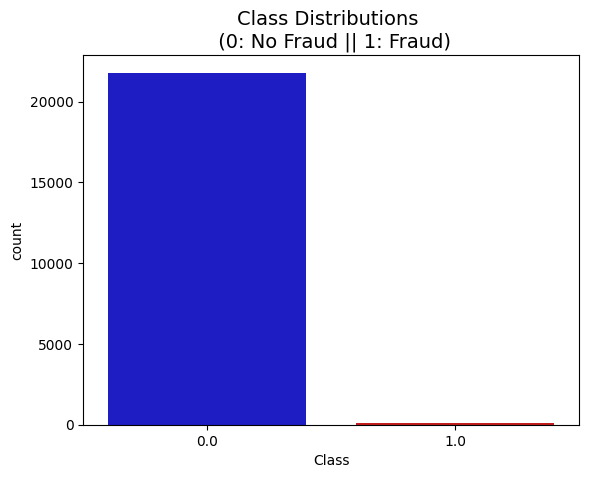

In [ ]:

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

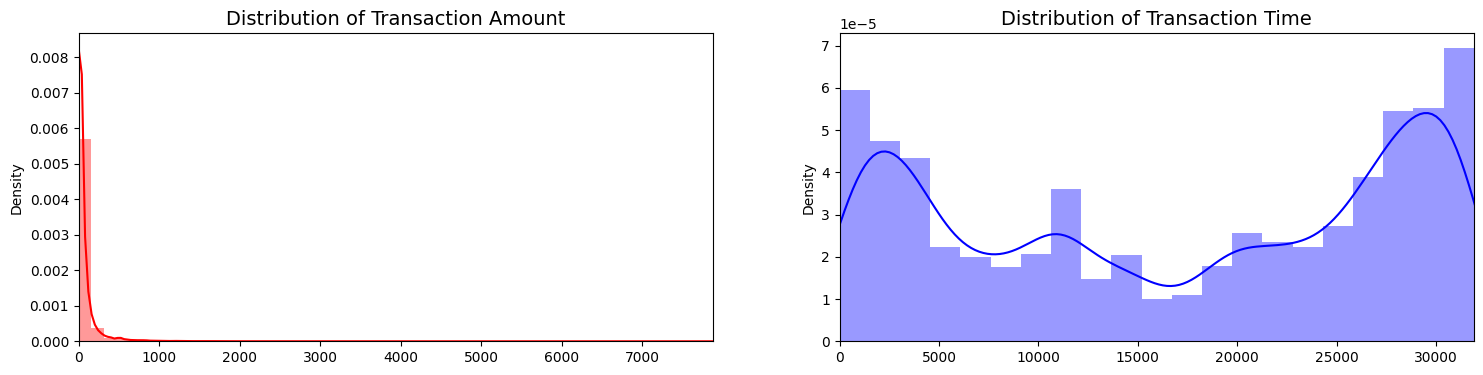

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.343794,-0.842388,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.261348,-0.842388,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,6.404787,-0.842343,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.880674,-0.842343,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.931915,-0.842298,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
print(df.isnull().sum())


scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

# Drop rows with missing target values
df.dropna(subset=['Class'], inplace=True)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data that's why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


No Frauds 99.61 % of the dataset
Frauds 0.39 % of the dataset
Train: [ 4361  4362  4363 ... 21874 21875 21876] Test: [   0    1    2 ... 6641 6717 6719]
Train: [    0     1     2 ... 21874 21875 21876] Test: [4361 4362 4363 ... 8972 9035 9179]
Train: [    0     1     2 ... 21874 21875 21876] Test: [ 8747  8748  8749 ... 13128 13129 13130]
Train: [    0     1     2 ... 21874 21875 21876] Test: [12070 12108 12261 ... 17511 17512 17513]
Train: [    0     1     2 ... 17511 17512 17513] Test: [15736 15751 15781 ... 21874 21875 21876]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99605759 0.00394241]
[0.99611429 0.00388571]


In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
11085,-0.131915,0.017301,0.054004,0.607999,0.903350,-0.658428,0.144216,-0.866246,0.440920,-0.250564,...,-0.041148,-0.046084,0.115421,-0.040464,-0.084052,-0.690104,1.295241,-0.038226,0.062163,0.0
6698,-0.043085,-0.468282,1.503093,-0.758407,0.895056,-1.148398,-1.492757,-0.827840,-1.054443,-0.351740,...,-0.256000,-0.499065,-0.761000,0.169904,0.324751,0.164308,-0.454799,0.026874,0.027399,0.0
7842,-0.131915,-0.352092,1.226069,0.547945,0.642395,1.305581,-0.163867,-0.804767,0.133321,-0.360868,...,-0.067258,-0.182405,-0.185030,-0.031961,0.363026,0.571633,-0.483655,0.005152,0.023757,0.0
17461,1.281738,0.447145,-2.462813,-2.205257,1.992598,-0.583305,2.188592,-0.672055,-1.120399,0.067868,...,-0.209404,-0.305553,-0.373987,-0.534177,-0.683807,-0.169434,0.833316,0.057955,-0.220778,0.0
20138,-0.056028,0.540357,-1.731958,-0.686196,1.575165,0.608946,2.060040,-0.935604,-0.153741,0.217603,...,0.228369,0.090347,-0.053739,0.002638,-0.283388,0.422311,-0.441873,0.046839,0.127708,0.0


Distribution of the Classes in the subsample dataset
Class
0.0    0.851211
1.0    0.148789
Name: count, dtype: float64


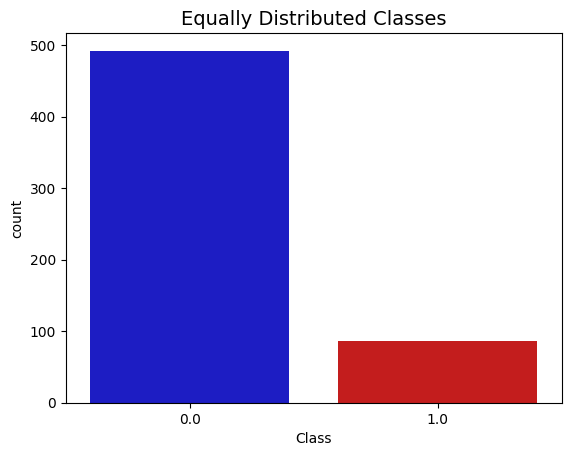

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x= 'Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

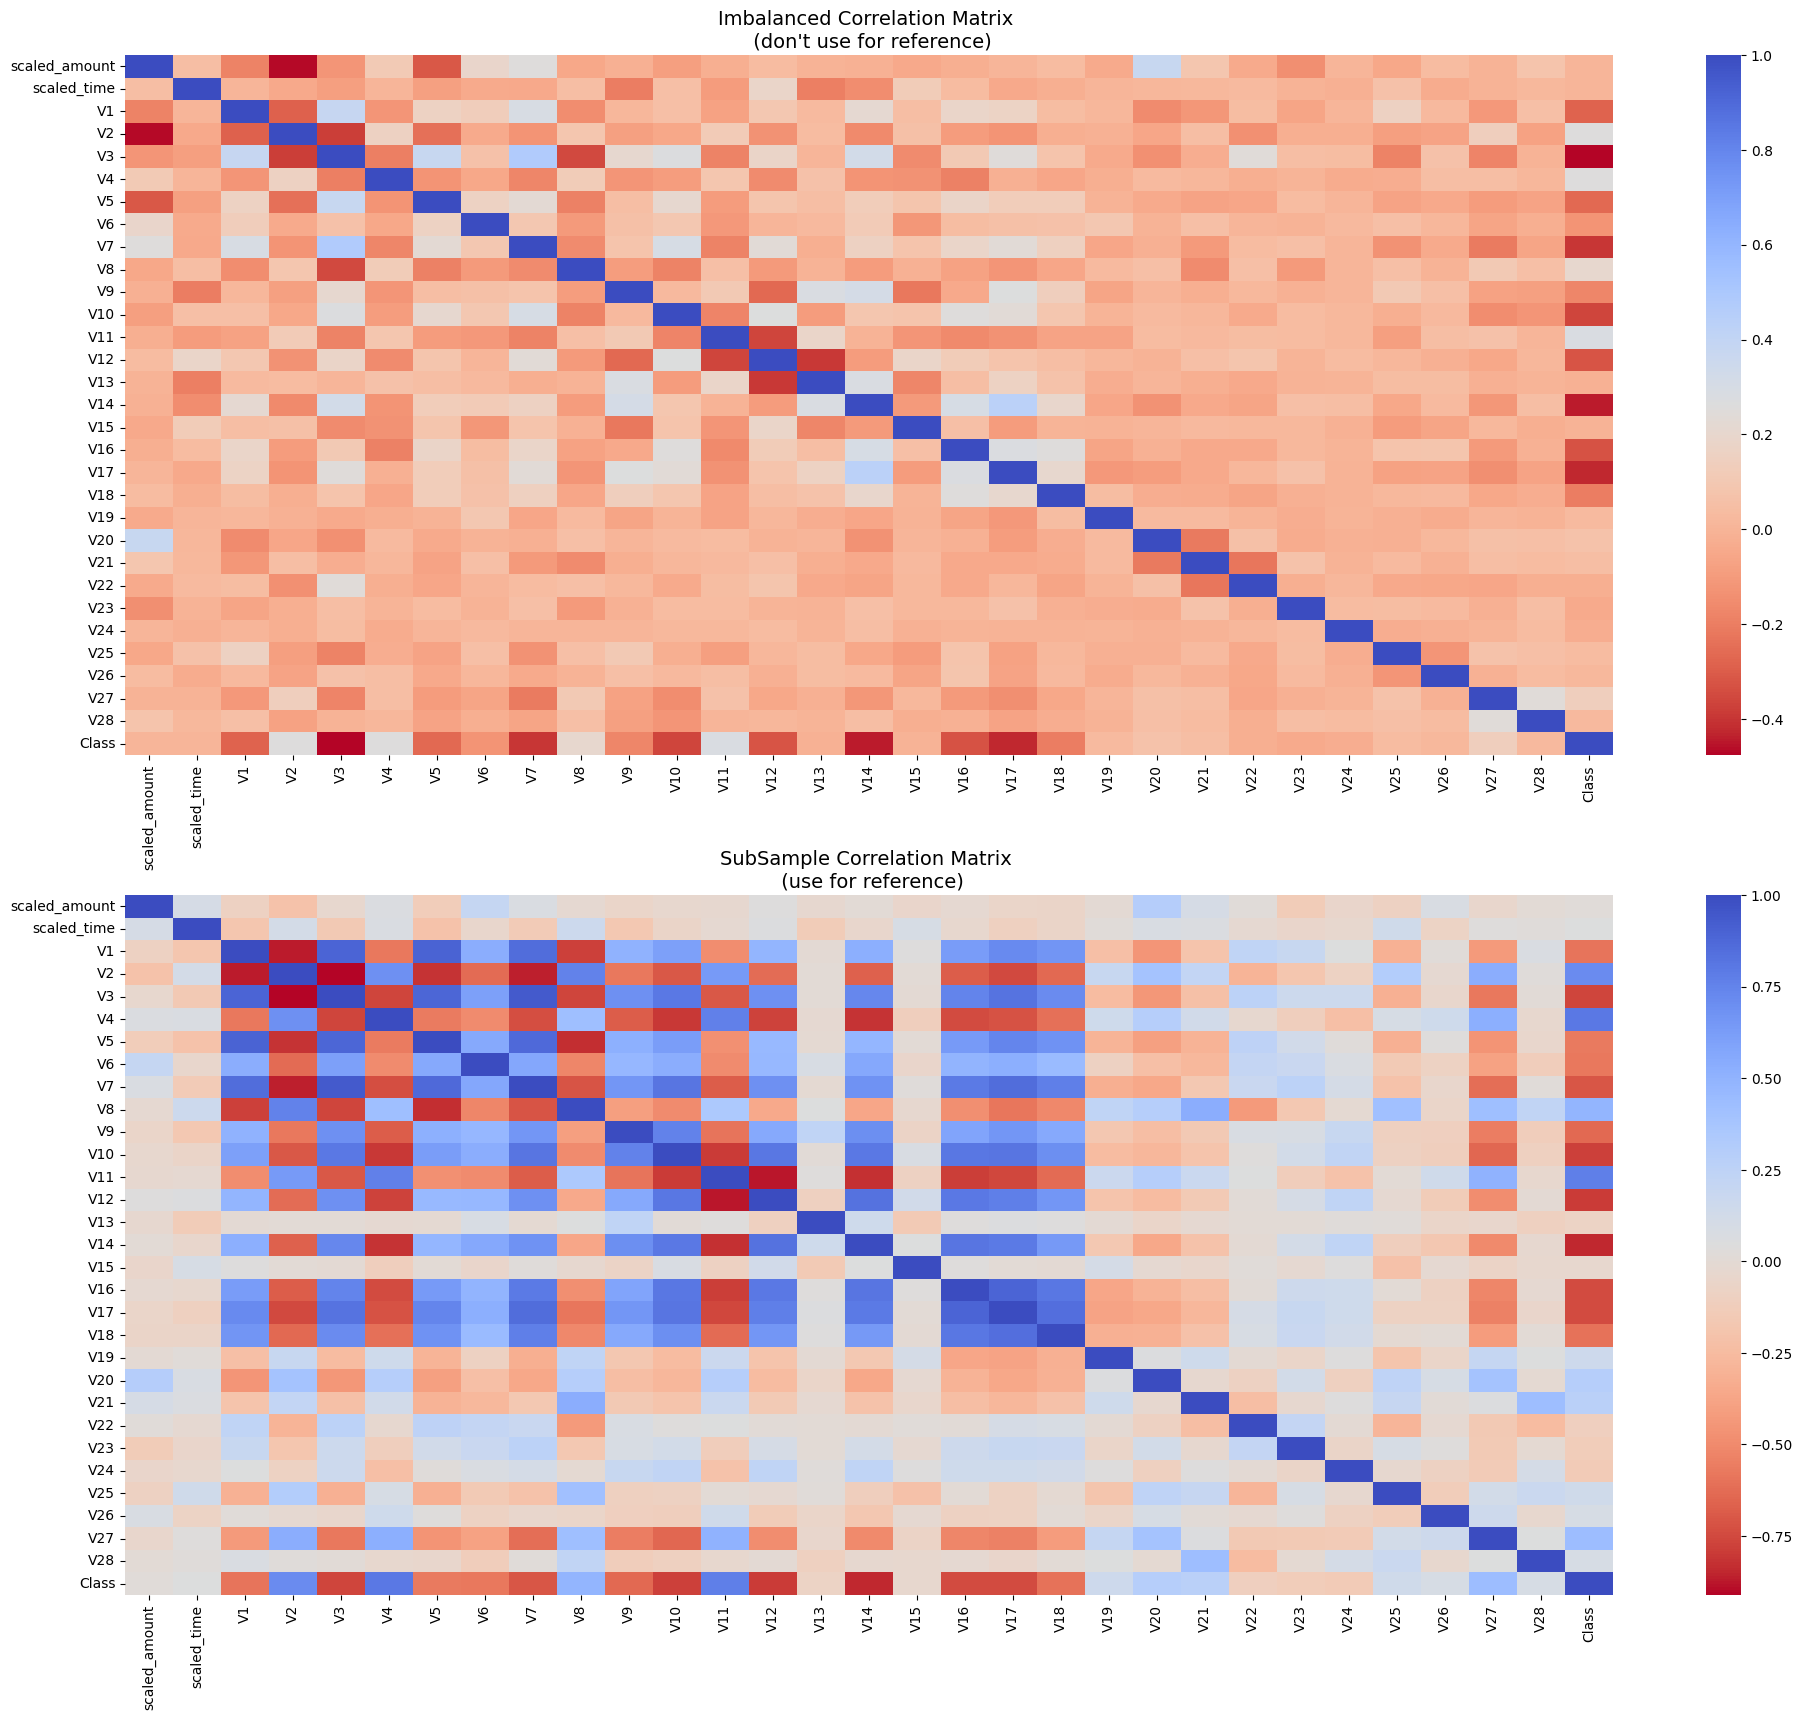

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

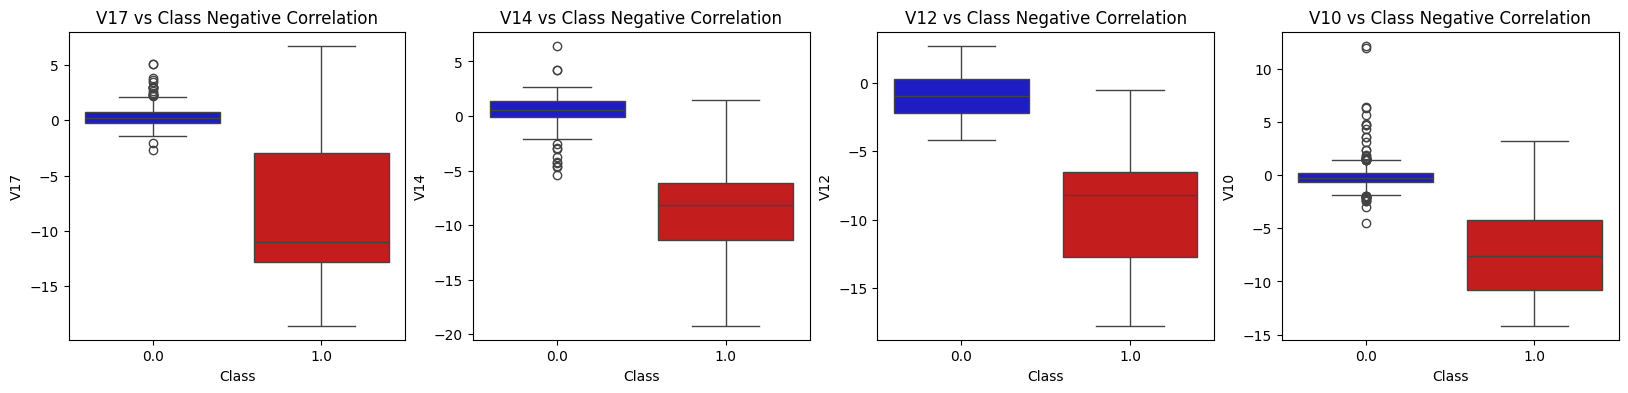

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

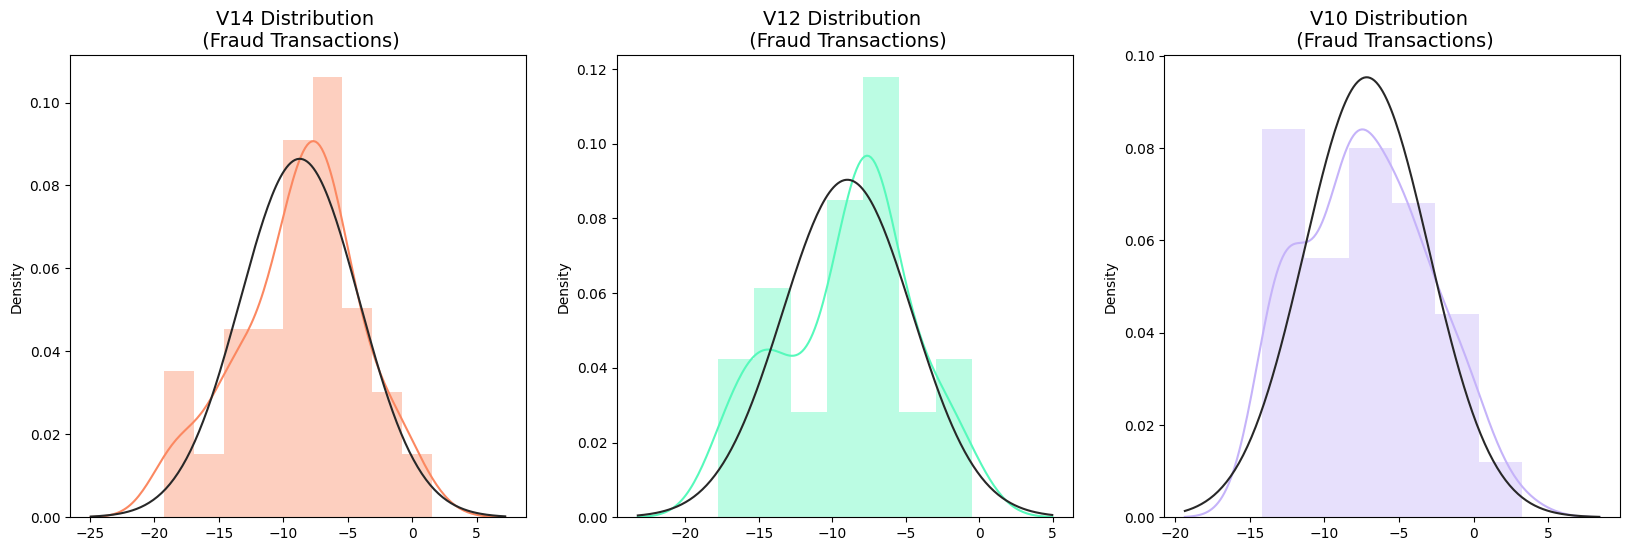

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -11.388670153126625 | Quartile 75: -6.112067331462608
iqr: 5.276602821664017
Cut Off: 7.914904232496026
V14 Lower: -19.303574385622653
V14 Upper: 1.8028369010334178
Feature V14 Outliers for Fraud Cases: 0
V10 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -22.049163807136303
V12 Upper: 2.7816527138411047
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 531
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -20.667219438923638
V10 Upper: 5.5967062846648945
V10 outliers: []
Feature V10 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 526


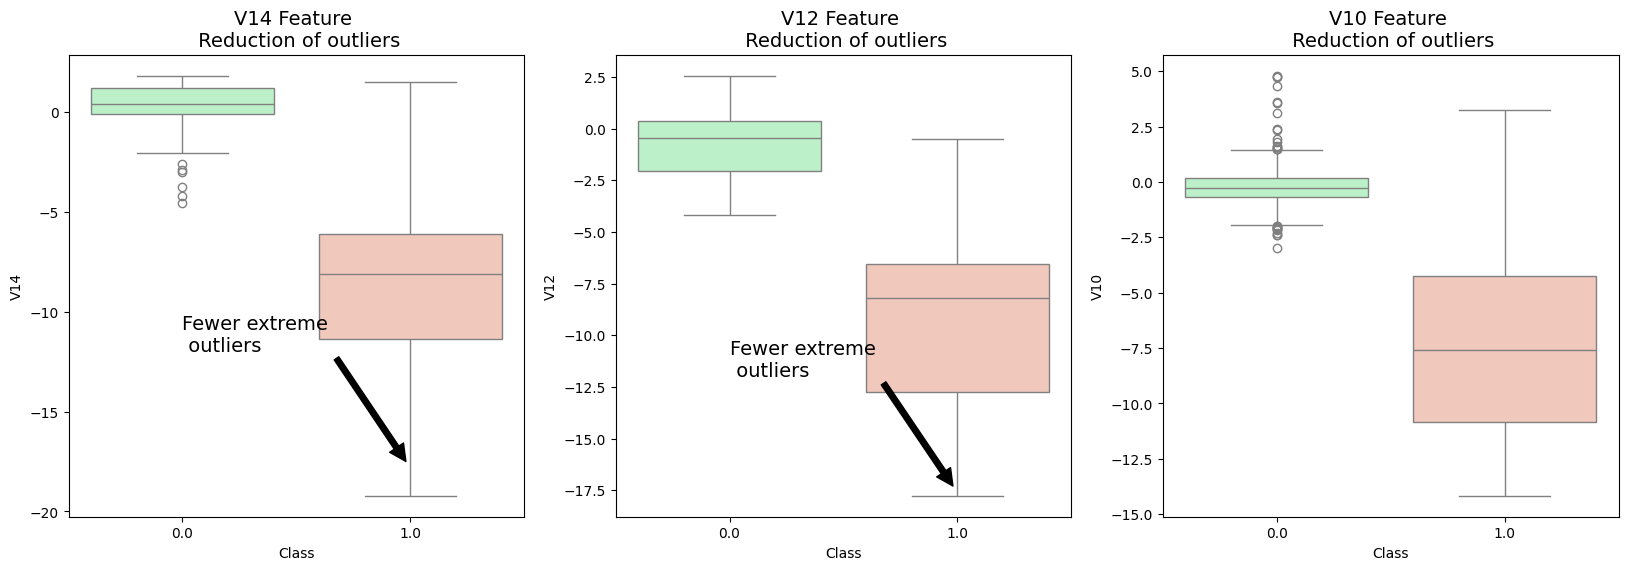

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()


# **Task 2**
Implement the following pipeline for your anomaly detection model:
• Data Augmentation: Leverage the properties of MTS (Multivariate Timeseries) and
expand the unexplored input space using a novel method called random mask, which follows
a geometric distribution.
• Generator: This module learns the underlying distribution of normal patterns in MTS and
reconstructs it precisely using a Transformer-based autoencoder.
• Discriminator: This module imposes constraints on the reconstructions within the GAN
framework to better capture normal patterns in MTS.
• Contrastive Learning: This module imposes contrastive constraints on representations of
MTS to enhance the generalization capability of the model, and facilitates joint training of the
Discriminator.

**Data Augmentation**

*Synthetic Minority OverSampling Technique (SMOTE)¶
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.*

In [ ]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
from sklearn import metrics


# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0.0: 308, 1.0: 60})
Resampled dataset shape Counter({0.0: 60, 1.0: 60})


In [ ]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [ ]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.95570
AUC : 0.95804
Precision : 0.80645
Recall : 0.96154
F1 : 0.87719


AUC -  0.9580419580419581 



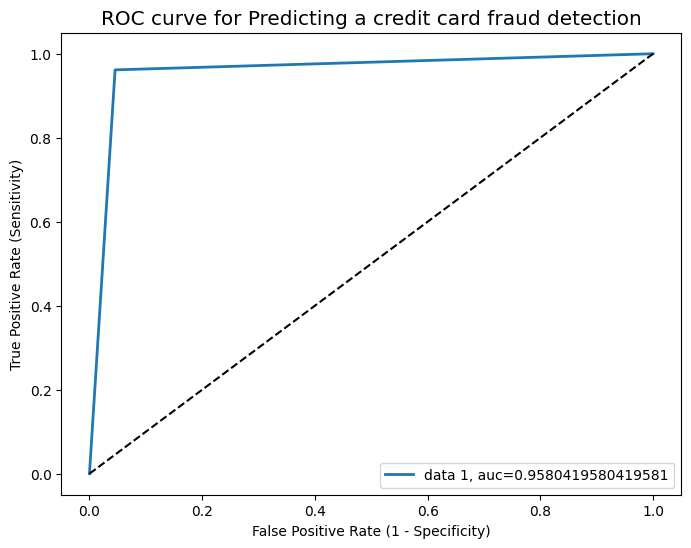

In [ ]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.877


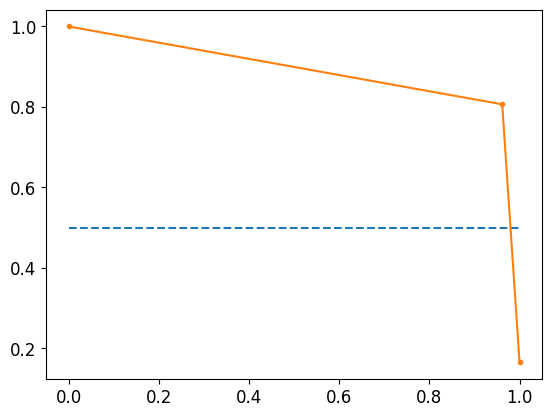

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

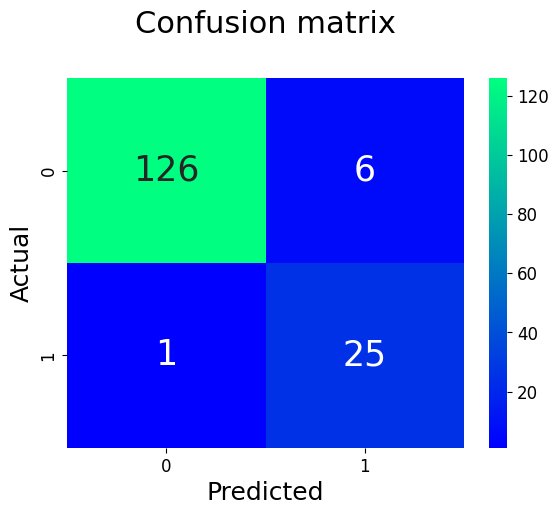

In [ ]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']);
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from numpy import float32
from tqdm import tqdm

from typing import Optional
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, precision_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.multiprocessing import set_start_method
!pip install pytorch-lightning

import pytorch_lightning as pl

from torch.utils.data import DataLoader, Dataset
import os

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 21.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [ ]:
random_seed = 123
torch.manual_seed(random_seed)

BATCH_SIZE=1000
AVAIL_GPUS = min(1, torch.cuda.device_count())
NUM_WORKERS=0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df_lean = df.drop(['Time','Amount'],axis=1)


In [ ]:
# Creating function to plot confusion metrics for evaluation
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [ ]:
train, test = train_test_split(df_lean, test_size=0.2, stratify=df['Class'])
train.shape, test.shape

((227845, 29), (56962, 29))

In [ ]:
# Normalizing the data
data_mean = train.iloc[:,:-1].mean()
data_std = train.iloc[:,:-1].std()
train_norm = (train.iloc[:,:-1] - data_mean)/data_std
test_norm = (test.iloc[:,:-1] - data_mean)/data_std
train_norm['Class'] =  train.iloc[:, -1]
test_norm['Class'] =  test.iloc[:, -1]

In [ ]:
train_norm['Class'].value_counts()


Class
0    227451
1       394
Name: count, dtype: int64

In [ ]:
class CreditCardDataFinal(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = torch.tensor(self.data[index][-1], dtype=torch.float32)
        row = torch.tensor(self.data[index][:-1], dtype=torch.float32)
        return row, label

class CreditCardDataModel(pl.LightningDataModule):
    def __init__(self, data: pd.DataFrame, batch_size=BATCH_SIZE, num_workers=0):
        super().__init__()
        self.data = data
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage: Optional[str] = None):
        train_df, test_df = train_test_split(self.data, random_state=123, test_size=0.2, stratify=self.data['Class'])
        self.train_df = torch.tensor(train_norm.to_numpy(float32), dtype=torch.float32)
        self.test_df =torch.tensor(test_norm.to_numpy(float32), dtype=torch.float32)

    def train_dataloader(self):
        return DataLoader(dataset=CreditCardDataFinal(self.train_df), batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(dataset=CreditCardDataFinal(self.test_df), batch_size=self.batch_size, num_workers=self.num_workers)


In [ ]:
class ModelCreditCard(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, 150),
            nn.LeakyReLU(0.1),
            nn.Linear(150, 50),
            nn.LeakyReLU(0.1),
            nn.Linear(50, 25),
            nn.LeakyReLU(0.1),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        tensor = torch.sigmoid(self.sequential(x))
        return tensor


class ModelTraining(pl.LightningModule):
    def __init__(self, model, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.model = model


    def training_step(self, batch, batch_idx):
        x, y = batch
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        y_hat = self.model(x)
        y = y.unsqueeze(1)
        loss = self.binary_loss(y_hat, y)
        return {"loss":loss}

    def binary_loss(self, y_hat,y):
        return F.binary_cross_entropy(y_hat, y)

    def configure_optimizers(self):
        lr = self.hparams.lr
        opt_g = torch.optim.Adam(self.model.parameters(), lr )
        return [opt_g], []




In [ ]:
model_card = ModelCreditCard(28)
model = ModelTraining(model_card)

dm = CreditCardDataModel(train_norm)

trainer = pl.Trainer(max_epochs=10, accelerator='gpu', devices=1)
trainer.fit(model, dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type            | Params
------------------------------------------
0 | model | ModelCreditCard | 13.2 K
------------------------------------------
13.2 K    Trainable params
0         Non-trainable params
13.2 K    Total params
0.053     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
test_pred = torch.tensor(test_norm.drop(["Class"], axis=1).to_numpy()).float()
test_true =  test_norm['Class'].to_numpy()
test_true = torch.tensor(test_true).unsqueeze(1).float()

In [ ]:
test_output_real = model_card.forward(test_pred)
test_pred_real = [1 if i > 0.5 else 0 for i in test_output_real]
recall_score(test_true, test_pred_real)

0.7551020408163265

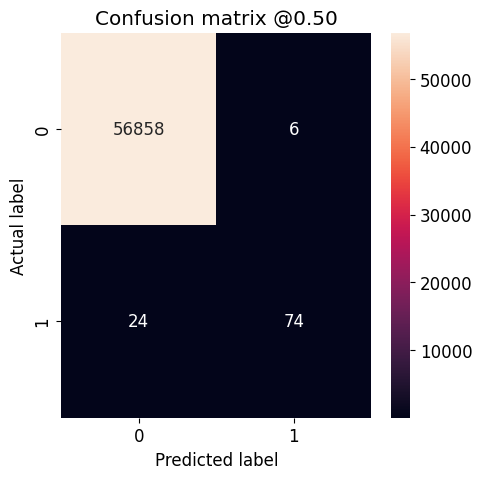

In [ ]:
plot_cm(test_true, test_pred_real)


Creating synthetic Data with GANs

In [ ]:
class CreditCardData(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = torch.tensor(self.data.iloc[index]).float()
        return row

In [ ]:
class DataModule(pl.LightningDataModule):
    def __init__(self, data: pd.DataFrame, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
        super().__init__()
        self.data = data
        self.batch_size = batch_size
        self.num_workers = num_workers

    def prepare_data(self):
        """
        Empty prepare_data method left in intentionally.
        https://pytorch-lightning.readthedocs.io/en/latest/data/datamodule.html#prepare-data
        """
        pass

    def setup(self, stage: Optional[str] = None):
        train_df, test_df = train_test_split(self.data, random_state=123, test_size=0.2)
        data_mean = train_df.mean()
        data_std = train_df.std()
        train_norm = (train_df - data_mean)/data_std
        test_norm = (test_df - data_mean)/data_std
        self.train_df = train_norm
        self.test_df = test_norm

    def train_dataloader(self):
        return DataLoader(dataset=CreditCardData(self.train_df), batch_size=self.batch_size, num_workers=self.num_workers)

    def valid_dataloader(self):
        return DataLoader(CreditCardData(self.val_df), batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(CreditCardData(self.test_df), batch_size=self.batch_size, num_workers=self.num_workers)


In [ ]:
# Detect if classification is real or fake
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(28, 150),
            nn.ReLU(),
            nn.Linear(150, 50),
            nn.ReLU(),
            nn.Linear(50, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        tensor = torch.sigmoid(self.sequential(x))
        return tensor

In [ ]:
# Generate fake data: Output in a shape of (1, 31)
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Linear(latent_dim, 100),
            nn.LeakyReLU(0.2),
            nn.Linear(100, 80),
            nn.LeakyReLU(0.2),
            nn.Linear(80, 40),
            nn.LeakyReLU(0.2),
            nn.Linear(40, 28)
        )

    def forward(self, x):
        output = self.sequential(x)
        return output

In [ ]:
class GAN(pl.LightningModule):
    def __init__(self, latent_dim=100, lr=0.002):
        super().__init__()
        self.save_hyperparameters() # Allow hyperparameters to be accessible

        self.generator = Generator(latent_dim = self.hparams.latent_dim)
        self.discriminator = Discriminator()

        # Random Noise
        self.validation_z = torch.randn(6, self.hparams.latent_dim)


    def forward(self, z):
        return self.generator(z)


    def adversarial_loss(self, y_hat, y):
        return F.binary_cross_entropy(y_hat, y)

    def training_step(self, batch, batch_idx, optimizer_idx):
        real_data = batch

        # sample noise
        z = torch.randn(real_data.size(0), self.hparams.latent_dim)

        # Train generator: max log(D(G(z)))
        if optimizer_idx == 0:
            fake_data = self.generator.forward(z)
            y_hat = self.discriminator(fake_data)
            y = torch.ones(real_data.size(0), 1)
            g_loss = self.adversarial_loss(y_hat, y)

            log_dict = {"g_loss":g_loss}
            return {"loss":g_loss, "progress_bar": log_dict, "log": log_dict}

        # Train discriminator: max log(D(x)) + log(1- D(G(z)))
        if optimizer_idx == 1:
            # How well can it label as real
            y_hat_real = self.discriminator(real_data)
            y_real = torch.ones(real_data.size(0), 1)
            real_loss = self.adversarial_loss(y_hat_real, y_real)

            # How will can it label fake data
            y_hat_fake = self.discriminator(self(z).detach()) # Add detach to prevent the tensor recalculating
            y_fake  = torch.zeros(real_data.size(0), 1)
            fake_loss = self.adversarial_loss(y_hat_fake, y_fake)
            d_loss = (real_loss + fake_loss)/2
            log_dict = {"d_loss": d_loss}
            return {"loss":d_loss, "progress_bar": log_dict, "log": log_dict}


    def configure_optimizers(self):
        lr = self.hparams.lr
        opt_g = torch.optim.Adam(self.generator.parameters(), lr )
        opt_d = torch.optim.Adam(self.discriminator.parameters(), lr )
        return [opt_g, opt_d], []


In [ ]:
only_pos = train_norm[train_norm['Class'] == 1 ].copy()
only_pos = only_pos.drop(['Class'], axis=1)
only_pos.shape

(394, 28)

In [ ]:
model = GAN()

In [ ]:
dm = DataModule(only_pos)
trainer = pl.Trainer(max_epochs=10)
trainer.fit(model, dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: Training with multiple optimizers is only supported with manual optimization. Remove the `optimizer_idx` argument from `training_step`, set `self.automatic_optimization = False` and access your optimizers in `training_step` with `opt1, opt2, ... = self.optimizers()`.

In [ ]:
z = torch.randn(100000, 100)
output = model(z)
output

tensor([[-0.0360, -0.0541,  0.0917,  ..., -0.2131, -0.1259, -0.1274],
        [-0.0414, -0.1261,  0.0794,  ..., -0.2498, -0.0862, -0.1410],
        [-0.0174, -0.0355,  0.0707,  ..., -0.1884, -0.1423, -0.1173],
        ...,
        [-0.0152, -0.0752,  0.0575,  ..., -0.2162, -0.1053, -0.1350],
        [-0.0415, -0.0287,  0.0677,  ..., -0.1922, -0.1614, -0.1211],
        [-0.0144, -0.0429,  0.0282,  ..., -0.1743, -0.1324, -0.1426]],
       grad_fn=<AddmmBackward0>)

In [ ]:
only_pos_df =  pd.DataFrame(output.detach().numpy())

In [ ]:
only_pos_df


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.035979,-0.054148,0.091735,0.103213,0.027816,-0.062765,-0.146286,-0.079603,-0.120412,-0.020911,...,-0.031850,0.007909,-0.058985,-0.036213,0.127324,-0.067518,0.102648,-0.213130,-0.125915,-0.127351
1,-0.041415,-0.126103,0.079423,0.104598,0.009915,-0.047821,-0.147500,-0.130952,-0.163118,-0.077302,...,-0.027812,0.043810,-0.096742,-0.040651,0.076387,-0.080128,0.089810,-0.249779,-0.086239,-0.141030
2,-0.017352,-0.035542,0.070732,0.131536,0.080933,-0.049991,-0.159779,-0.034425,-0.050896,0.010343,...,0.022198,0.040739,-0.026672,-0.062043,0.106981,-0.029380,0.030601,-0.188429,-0.142319,-0.117285
3,-0.013954,0.043995,0.094432,0.110004,0.021161,-0.121364,-0.106694,-0.074624,-0.038490,0.059081,...,0.006644,0.072293,-0.042744,-0.124685,0.103356,-0.155699,0.043200,-0.140806,-0.218701,-0.105236
4,-0.032852,0.018492,0.070776,0.107922,0.063196,-0.065467,-0.138651,-0.040744,-0.078334,0.020682,...,-0.059671,0.000074,-0.079497,-0.018988,0.091223,-0.125171,0.029801,-0.166637,-0.183021,-0.143360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.028316,-0.040321,0.114472,0.080190,0.053613,-0.037279,-0.140431,-0.075397,-0.168247,-0.007098,...,-0.044751,0.046126,-0.040535,-0.112456,0.103277,-0.034018,0.045141,-0.224076,-0.080543,-0.079045
99996,0.011267,0.049865,0.041858,0.091673,0.061557,-0.105264,-0.110323,-0.038703,-0.101874,0.016066,...,-0.030759,-0.018987,-0.086127,-0.107813,0.128814,-0.113702,0.049761,-0.186143,-0.142336,-0.111370
99997,-0.015160,-0.075156,0.057541,0.109349,0.046575,-0.021423,-0.151470,-0.082439,-0.107467,-0.021431,...,0.052115,0.078440,-0.075273,-0.105113,0.109597,-0.026147,-0.011101,-0.216228,-0.105344,-0.134967
99998,-0.041459,-0.028675,0.067681,0.074465,0.105142,0.040305,-0.146164,-0.016144,-0.139308,0.019187,...,-0.100571,-0.002510,-0.083789,0.005703,0.080695,-0.082030,0.032921,-0.192237,-0.161351,-0.121093


In [ ]:
only_pos_df['Class'] = 1


In [ ]:
only_neg_real_df = train_norm[train_norm['Class'] == 0]

# **Task 3**
Implement further anomaly detection models based on the following concepts:
- Principal Component Analysis (PCA)
- Graph Deviation Network (GDN)
- Anomaly Transformer
- One-Class SVM
- Isolation Forest
- Local Outlier Factor
- DBSCAN
- Bonus: Dynamic Time Warping (DTW)
- Bonus: Seasonal Hybrid Extreme Studentized Deviate (S-H-ESD):

In [ ]:
# PSA Task 3 (i think)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.9 s
PCA took 0.0039 s
Truncated SVD took 0.0031 s


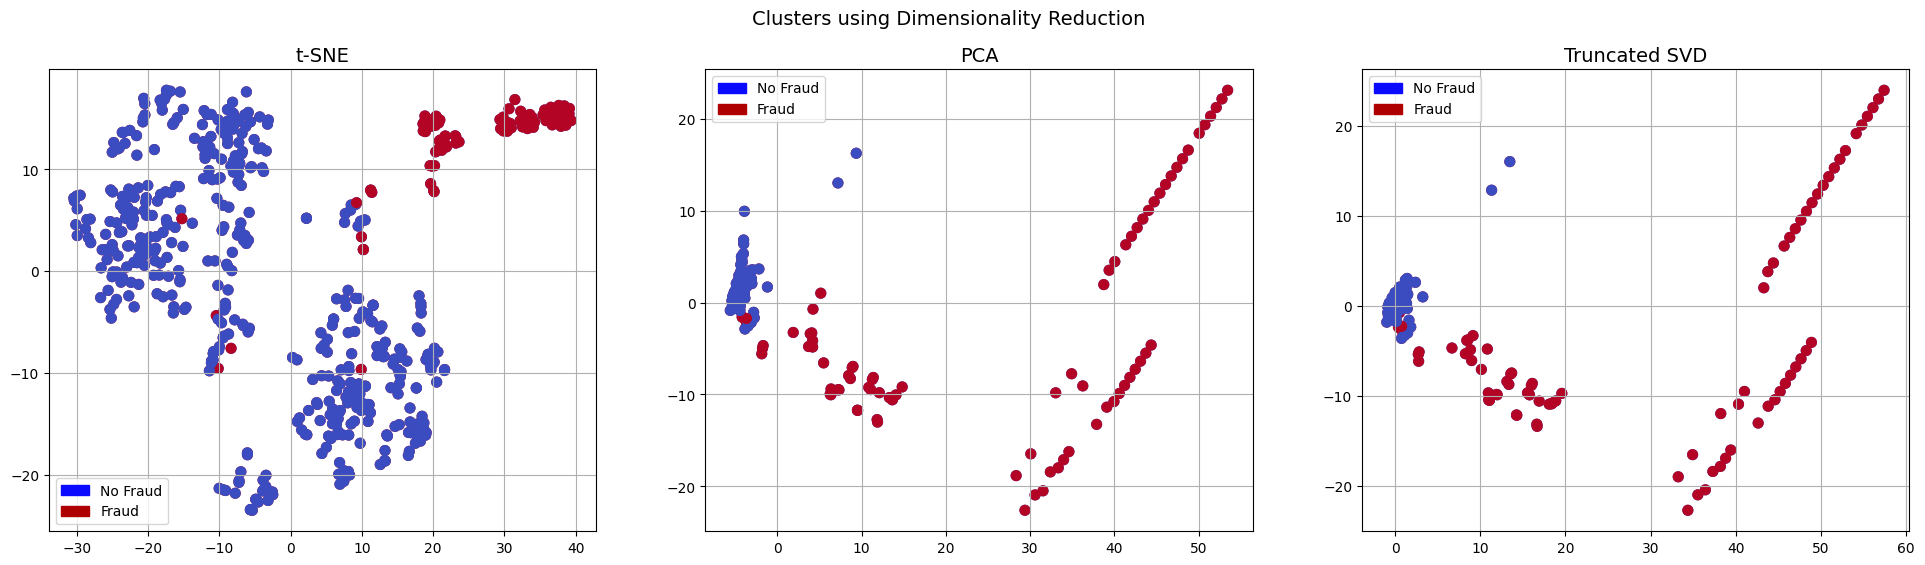

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
import networkx as nx
import numpy as np

# Generate or load your data
# Assuming you have your data in a format like numpy array X where each row represents a data point

# Construct a similarity graph
def construct_similarity_graph(X, k=5, epsilon=1e-6):
    """
    Construct a k-nearest neighbor graph based on the Euclidean distance between data points.

    Parameters:
    X (numpy.ndarray): Data points matrix of shape (n_samples, n_features).
    k (int): Number of nearest neighbors for each data point.
    epsilon (float): Small value to avoid division by zero.

    Returns:
    nx.Graph: Constructed similarity graph.
    """
    n_samples = X.shape[0]
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(n_samples):
        G.add_node(i)

    # Compute pairwise distances
    distances = np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=-1)

    # Add edges based on k-nearest neighbors
    for i in range(n_samples):
        indices = np.argsort(distances[i])[:k+1]  # Including self, hence k+1
        for j in indices:
            if i != j:
                similarity = 1 / (distances[i, j] + epsilon)
                G.add_edge(i, j, weight=similarity)

    return G

# GDN anomaly detection
def gdn_anomaly_detection(X, k=5):
    """
    Detect anomalies using Graph Deviation Network.

    Parameters:
    X (numpy.ndarray): Data points matrix of shape (n_samples, n_features).
    k (int): Number of nearest neighbors for constructing the similarity graph.

    Returns:
    list: List of indices of detected anomalies.
    """
    # Construct the similarity graph
    G = construct_similarity_graph(X, k=k)

    # Compute node deviations
    node_deviations = nx.clustering(G, weight='weight')  # Using clustering coefficient as deviation measure

    # Identify anomalies based on deviations
    anomaly_indices = [i for i, deviation in node_deviations.items() if deviation < np.mean(list(node_deviations.values()))]

    return anomaly_indices

# Example usage:


In [ ]:
anomaly_indices = gdn_anomaly_detection(X)


InvalidIndexError: (slice(None, None, None), None, slice(None, None, None))

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

import warnings
warnings.filterwarnings("ignore")



In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data = data.drop_duplicates()

In [ ]:
lis=["Not Fraud","Frauds"]
fraud_or_not = data["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=data['Class'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Frauds & genuin transactions")
fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
std_scaler = StandardScaler()
data['Scaled_Amount']=std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Amount','Time'],axis=1,inplace=True)
# drop the old feature in addition to the "time" feature
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [ ]:
data.describe().round(2).style.background_gradient()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.010000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
std,1.950000,1.650000,1.510000,1.410000,1.380000,1.330000,1.230000,1.180000,1.100000,1.080000,1.020000,0.990000,1.000000,0.950000,0.910000,0.870000,0.840000,0.840000,0.810000,0.770000,0.720000,0.720000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,0.040000,1.000000
min,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,-0.350000
25%,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,0.000000,-0.330000
50%,0.020000,0.060000,0.180000,-0.020000,-0.050000,-0.280000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,0.000000,-0.270000
75%,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,0.000000,-0.040000
max,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,1.000000,102.250000


In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
fig = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance",color_discrete_sequence=["skyblue","black"])
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

# Step 1: Load the dataset
data = pd.read_csv('creditcard.csv')

# Step 2: Preprocess the data (if needed)
# No preprocessing is performed in this example

# Step 3: Construct a similarity graph
def construct_similarity_graph(X, k=5, epsilon=1e-6):
    """
    Construct a k-nearest neighbor graph based on the Euclidean distance between data points.

    Parameters:
    X (numpy.ndarray): Data points matrix of shape (n_samples, n_features).
    k (int): Number of nearest neighbors for each data point.
    epsilon (float): Small value to avoid division by zero.

    Returns:
    nx.Graph: Constructed similarity graph.
    """
    n_samples = X.shape[0]
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(n_samples):
        G.add_node(i)

    # Compute pairwise distances
    distances = np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=-1)

    # Add edges based on k-nearest neighbors
    for i in range(n_samples):
        indices = np.argsort(distances[i])[:k+1]  # Including self, hence k+1
        for j in indices:
            if i != j:
                similarity = 1 / (distances[i, j] + epsilon)
                G.add_edge(i, j, weight=similarity)

    return G

# Step 4: Compute node deviations
def compute_node_deviations(G):
    """
    Compute node deviations using clustering coefficient as the deviation measure.

    Parameters:
    G (nx.Graph): Input graph.

    Returns:
    dict: Dictionary mapping node indices to their deviations.
    """
    return nx.clustering(G, weight='weight')  # Using clustering coefficient as deviation measure

# Step 5: Detect anomalies based on deviations
def detect_anomalies(node_deviations):
    """
    Detect anomalies based on node deviations.

    Parameters:
    node_deviations (dict): Dictionary mapping node indices to their deviations.

    Returns:
    list: List of indices of detected anomalies.
    """
    mean_deviation = np.mean(list(node_deviations.values()))
    return [i for i, deviation in node_deviations.items() if deviation < mean_deviation]

# Apply the steps
X = data.drop(['Class'], axis=1).values  # Drop only the 'Class' column
G = construct_similarity_graph(X)
node_deviations = compute_node_deviations(G)
anomalies = detect_anomalies(node_deviations)

# Print the indices of detected anomalies
print("Detected anomalies indices:", anomalies)


# T3 Cont


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Preprocessing
X = data.drop(columns=["Time", "Class"])  # Drop non-feature columns
y = data["Class"]  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Implementing PCA for anomaly detection
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# One-Class SVM
svm = OneClassSVM()
svm.fit(X_train_scaled)
y_pred_svm = svm.predict(X_test_scaled)


In [ ]:
# Isolation Forest
isolation_forest = IsolationForest()
isolation_forest.fit(X_train_scaled)
y_pred_iso_forest = isolation_forest.predict(X_test_scaled)



In [ ]:
# Local Outlier Factor
lof = LocalOutlierFactor()
y_pred_lof = lof.fit_predict(X_test_scaled)



In [ ]:
# DBSCAN
dbscan = DBSCAN()
y_pred_dbscan = dbscan.fit_predict(X_test_scaled)


In [ ]:
# Evaluation
print("One-Class SVM:")
print(classification_report(y_test, y_pred_svm))

print("Isolation Forest:")
print(classification_report(y_test, y_pred_iso_forest))

print("Local Outlier Factor:")
print(classification_report(y_test, y_pred_lof))

print("DBSCAN:")
print(classification_report(y_test, y_pred_dbscan))

# T4


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score

# Define a function to evaluate each method and return F1 score, AUC score, and time taken
def evaluate_method(method, X_train, X_test):
    start_time = time.time()
    method.fit(X_train)
    y_pred = method.predict(X_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    time_taken = end_time - start_time
    return f1, auc, time_taken

# Initialize lists to store results
methods = ["PCA", "One-Class SVM", "Isolation Forest", "Local Outlier Factor", "DBSCAN"]
f1_scores = []
auc_scores = []
times_taken = []


In [ ]:
# Evaluate each method
# PCA
f1_pca, auc_pca, time_pca = evaluate_method(pca, X_train_scaled, X_test_scaled)
f1_scores.append(f1_pca)
auc_scores.append(auc_pca)
times_taken.append(time_pca)

# One-Class SVM
f1_svm, auc_svm, time_svm = evaluate_method(svm, X_train_scaled, X_test_scaled)
f1_scores.append(f1_svm)
auc_scores.append(auc_svm)
times_taken.append(time_svm)

# Isolation Forest
f1_iso_forest, auc_iso_forest, time_iso_forest = evaluate_method(isolation_forest, X_train_scaled, X_test_scaled)
f1_scores.append(f1_iso_forest)
auc_scores.append(auc_iso_forest)
times_taken.append(time_iso_forest)

# Local Outlier Factor
f1_lof, auc_lof, time_lof = evaluate_method(lof, X_train_scaled, X_test_scaled)
f1_scores.append(f1_lof)
auc_scores.append(auc_lof)
times_taken.append(time_lof)

# DBSCAN
f1_dbscan, auc_dbscan, time_dbscan = evaluate_method(dbscan, X_train_scaled, X_test_scaled)
f1_scores.append(f1_dbscan)
auc_scores.append(auc_dbscan)
times_taken.append(time_dbscan)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))



In [ ]:
# F1 Score
axes[0].bar(methods, f1_scores, color='skyblue')
axes[0].set_title('F1 Score')
axes[0].set_ylabel('Score')

In [ ]:
# AUC Score
axes[1].bar(methods, auc_scores, color='salmon')
axes[1].set_title('AUC Score')
axes[1].set_ylabel('Score')


In [ ]:
# Time Taken
axes[2].bar(methods, times_taken, color='lightgreen')
axes[2].set_title('Time Taken (seconds)')
axes[2].set_ylabel('Time')


In [ ]:
plt.tight_layout()
plt.show()
